In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.callbacks import ModelCheckpoint
from random import randint
from matplotlib import pyplot as pl

In [57]:
with open("companies.csv") as corpus_file:
    corpus = corpus_file.read()
    corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 2567883 characters


In [58]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

Our corpus contains 150 unique characters.


In [59]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
sentence_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - sentence_length, skip):
    sentence = corpus[i:i + sentence_length]
    next_char = corpus[i + sentence_length]
    X_data.append([encoding[char] for char in sentence])
    y_data.append(encoding[next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_sentences, sentence_length))

Sliced our corpus into 855958 sentences of length 10


In [60]:
print(X_data[1])

[70, 78, 74, 63, 87, 1, 40, 76, 65, 15]


In [61]:
print([decoding[idx] for idx in X_data[1]])
print(decoding[y_data[1]])

['h', 'p', 'l', 'a', 'y', ' ', 'I', 'n', 'c', '.']




In [62]:
# Vectorize our data and labels. We want everything in one-hot.
print("Vectorizing X and y...")
X = np.zeros((num_sentences, sentence_length, num_chars), dtype=np.bool)
y = np.zeros((num_sentences, num_chars), dtype=np.bool)
for i, sentence in enumerate(X_data):
    for t, encoded_char in enumerate(sentence):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

Vectorizing X and y...


In [75]:
# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sentences: {1} Characters in corpus: {2}"
      .format(y.shape, num_sentences, len(chars)))
print("Sanity check X. Dimension: {0} Sentence length: {1}"
      .format(X.shape, sentence_length))

Sanity check y. Dimension: (855958, 150) # Sentences: 855958 Characters in corpus: 150
Sanity check X. Dimension: (1, 10, 150) Sentence length: 10


In [76]:
# Define our model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(sentence_length, num_chars), 
                    return_sequences=False))
model.add(Dense(num_chars))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 64)                13760     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               9750      
_________________________________________________________________
activation_7 (Activation)    (None, 150)               0         
Total params: 23,510
Trainable params: 23,510
Non-trainable params: 0
_________________________________________________________________


In [77]:
#training time
E = 10
log = model.fit(X, y, epochs=E, batch_size=128)

ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 855958 target samples.

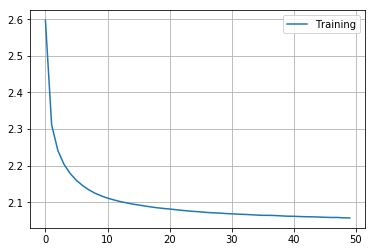

In [67]:
pl.plot(log.history['loss'], label='Training')
pl.legend()
pl.grid()

In [68]:
def make_seed(seed_phrase=""):
        if seed_phrase:
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, sentence_length):
                pattern += seed_phrase[i % phrase_length]
        else:
            seed = randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]

        return pattern

In [80]:
seed_pattern = make_seed("Nike")
print(seed_pattern)

NikeNikeNi


In [81]:
X = np.zeros((1, sentence_length, num_chars), dtype=np.bool)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # alternative is to use argmax: prediction = np.argmax(output_prob)
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=np.bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

_ fx}>1>YC§UÑÑ5ÊTlçîyõmPo*l1t[%:oO3ÏNyPA-Ykd~h.$/ql%ï*Cl1}%_«PIêkç-F8NgDV/ÊzÏ¥AU]v\E=H1,«XDqUê8}¡~APvkrAsÕBFE|dsï3ê¾?3 y3oK.^G1V3tJy.ªCû{@çp!HD=¥,3çf_[t
]4F>4g@B_vÌ6y¯ZH'&5õg@f(&oYoIìsDAPNÔN©W~Õ[W+887.jZ] a¾@H9~12^
h]Sï§Ì4uy¯)_[,?¥Q](2gMaF/«>BÕÐc9*ËTò_¯Eï*|ç0v9kEnk5sd!A}!HV^jh&êª¯ç:Õ,~IA"PÊ8r§u \ a9õ4L\ìq¿¨-=µ7òG¨v- k*/BC^^ÔA&¥-eïÕ/aÏõX-4 8¨eªJ
6r>}¥:".ªjh](#}¯5y
2
%z6Qc._m"ÔtbïmµÔ¥Wûo+tm>MõWT#a
